#### "Deep Learning has been compared to electricity. I'd like to provide another analogy: **alchemy**." -- Ali Rahimi, NIPS 2017

* The goal of this notebook is to provide the reader with some intuition of how deep learning works in practice, by running a series of simple experiments that illustrate when certain neural networks work well and when they don't. By the end of the notebook, the surprising effectiveness of deep learning may remain a mystery, but hopefully the reader will have a better sense of its potential and limitations.
* All of the experiments here are written in Python using the [tensorflow](https://www.tensorflow.org/) library, but most of the tensorflow has been abstracted away to make the experiments easier to run. See the accompanying `utils.py` file for full code. 

In [8]:
import sys, os; sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('global_utils'))))
from global_utils import *
from utils import *

import tensorflow as tf, numpy as np
import matplotlib.pyplot as plt
pretty_plotting_styles()
timer = Timer()

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Why Use Neural Networks in the First Place?

* The [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem), states that a neural network with a single hidden layer and a standard activation function can approximate any continuous function, if the hidden layer has a sufficient number of units. 
* Let's show this in practice by seeing how many units it takes to approximate some select functions to a desired degree of accuracy. 

$$f(x) = \sin(12x)$$
$$f(x) = -2x^4 + x^3 + x^2 - 2x + 0$$
$$f(x) = \lvert x \rvert$$

Elapsed time: 50.44 s


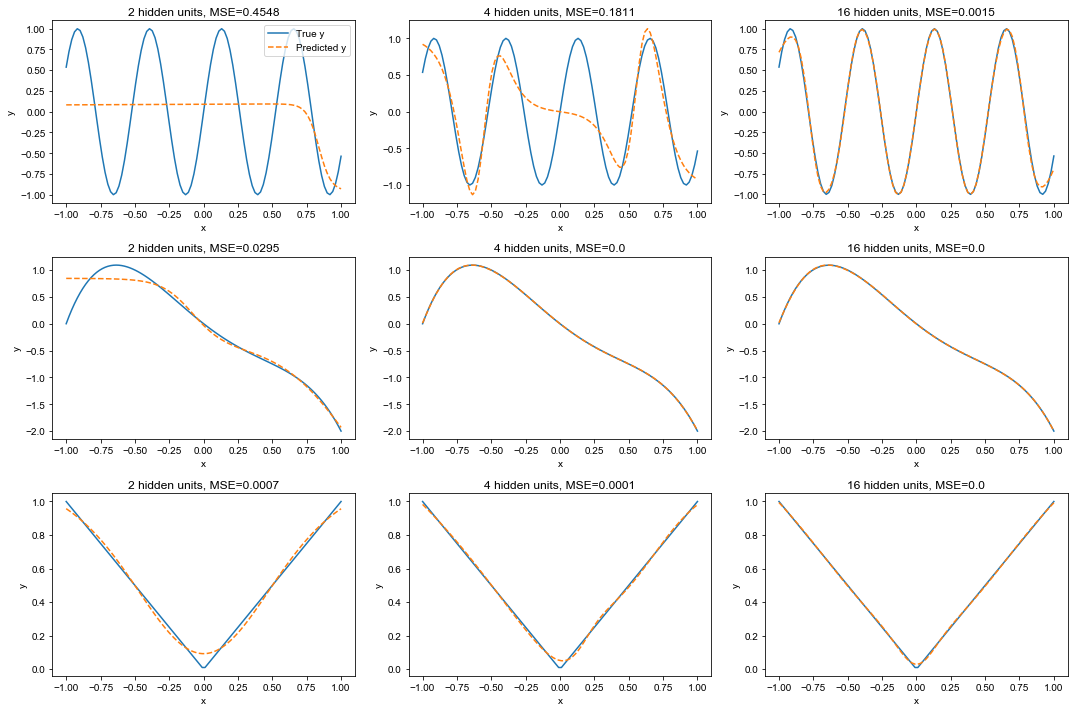

In [9]:
functions = (sin(omega=12),polynomial([0,-2,1,1,-2]),np.abs)
n_hidden_units = (2, 4, 16) 
experiment = Experiment1()
experiment.initialize()

timer.start()
plt.figure(figsize=[15,10])
plot_idx = 1
for function in functions:
    for n_hidden in n_hidden_units:
        x_values, y_values, y_pred, loss = experiment.run(n_hidden=n_hidden, function=function, verbose=False)
        plt.subplot(3,3,plot_idx)
        plt.plot(x_values, y_values, '-',label='True y')
        plt.plot(x_values, y_pred, '--',label='Predicted y')
        plt.xlabel('x')
        plt.ylabel('y')
        if (plot_idx==1):
            plt.legend()
        plt.title(str(n_hidden)+' hidden units, MSE='+str(np.round(loss,4)))
        plot_idx+=1
plt.tight_layout()
timer.end_and_print()

A few points:
* For certain kinds of functions (like polynomials), we can calculate how many neurons are needed to approximate the function arbitrarily well. See [(Mhaskar, 1996)](https://pdfs.semanticscholar.org/694a/d455c119c0d07036792b80abbf5488a9a4ca.pdf) for proofs.
* Although the universal approximation theorem says that neural network with enough parameters can approximate a true classification/regression function, it doesn't say anything about whether these parameters are _learnable_ through a procedure like stochastic gradient descent.

# 2(a). Why are Deeper Networks Better?

* It turns out that deep networks are more efficient at representing certain kinds of functions than shallow networks. 
* For example, it has been proven that [expressing simple radial functions](https://arxiv.org/pdf/1512.03965.pdf) (in which the output is a function of the norm of the input vector) require an exponential number of hidden units for 1-hidden-layer networks, but not so for deep networks. 
* I don't know if radial functions have real-world significance, but it has also been shown that *compositional functions* (those that are functions of a small number of functions of a small number of functions ... of a small number of variables) are also [more expressible with deep networks](https://arxiv.org/pdf/1603.00988.pdf) than shallow networks. These networks probably do a good job of representing a variety of functions of significance in the real world.

$$ (x_1+x_2+x_3+x_4)^p $$

0
1
2
0
1
2
Elapsed time: 155.385 s


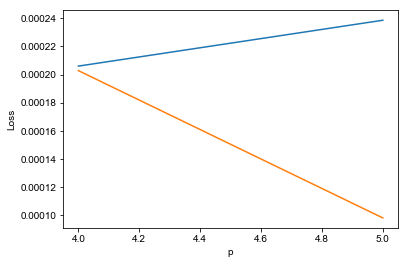

In [5]:
experiment = Experiment2()

loss_shallow = np.zeros((iters, len(powers)))
loss_deep = np.zeros((iters,len(powers)))

timer.start()
for p, power in enumerate(powers): 
    for i in range(iters):
        print(i)
        loss_s, loss_d = experiment.run(
                                verbose=False, 
                                function=polynomial_to_power(power=power))
        loss_shallow[i,p] = loss_s
        loss_deep[i,p] = loss_d
    
plt.plot(powers, np.min(loss_shallow,axis=0), '-',label='1 Hidden Layer')
plt.plot(powers, np.min(loss_deep,axis=0), '-',label='2 Hidden Layers')
plt.xlabel('p')
plt.ylabel('Loss')
timer.end_and_print()

# 2(b). Deeper Networks are Also Easier to Train 

* It's not just that deeper networks are more _expressive_ than shallow networks, but a remarkable result is that they are easier to train.  
* Using a technique called [model compression](http://datascienceassn.org/sites/default/files/Do%20Deep%20Nets%20Really%20Need%20to%20be%20Deep.pdf), it's been shown that shallow networks that are trained to *mimic* deeper networks often do better than shallow networks trained on the data directly.
* Let's show that here

# 3. Does the Activation Function Matter?

- [Activation Functions] What if polynomials are used instead? What about Leakiness? What about sins?
http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html

# 4. With How Much Data Are Neural Networks Better than Other Techniques?

# 5. Does the Optimizer Matter?

# Do Noisy Labels Hurt Neural Networks?

# What About Completely Random Labels?

# How Does Batching Effect the Results

# Does Training a Neural Network End-to-End Help?

# Can Neural Networks Handle Imbalanced Datasets?

- why log likelihood? What if you have two identical inputs in two different classes? Does the model break?


# Should We Emphasize Certain Data Points During Training?

# Do Unhelpful Features Hurt? How Much?

# Do Neural Networks Memorize or Generalize?

# Does Unsupervised Feature Reduction Help or Hurt?

# Do Neural Networks Have Lots of Local Minima?

# How Does Regularization Help a Neural Network? Dropout

http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html

# What is Batch Normalization and Why Does it Help?

# How Much Does Data Augmentation Help?

# What about Initialization?

# Learning Rate and Momentum

http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html

If you would like to cite this, please cite 